# Assignment 4

This assignment covers material on numerical integration. The assignment is due on by 7pm on Friday the 6th of March.

The breakdown of the marks is as follows:

Question 0 - [1 mark]  
Question 1 - [4 marks]  
Questino 2 - [5 marks]  
Question 3 - [5 marks]  
Question 4 - [5 marks]  
Question 5 - [5 marks]  
Question 6 - [5 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1

In this question you will be asked to evaluate definite integrals in the form:

$$ \int_a^b f(x)\, dx$$ 

using Simpson's rule. You can copy code from the [examples repository](https://github.com/nielsw2/ACM20030-Examples) if you wish, but if you do remove all the plotting functionality. Do not use SciPy or any other library to evaluate the integrals, unless explicitly asked to do so.

In [2]:
def SimpsonsIntegrate(f, a, b, N):
    dx = (b - a)/N #Differnce in limits divded by step number 
    xi = a #intial condition
    area = 0 #setting both parameters to zero
    i = 0
    while i < N:
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx)) #determinint area of a function whilst i is less than step number. 
        xi += dx
        i += 1        
    return area

## Q1 a

Evaluate $$ \frac{1}{\sqrt{\pi}}\int^{10}_{-10} e^{-x^2}\, dx$$

Use enough strips so that the result is accurate to a relative error of of at least 1e-6. Hint: to within machine precision the above integral evaluates to  1 .

In [4]:
def a(x): #defining function
    return np.e**(-x**2)/np.sqrt(np.pi)

In [16]:
SimpsonsIntegrate(a,-10,10, 40) #testing steps until desired output is found. 

1.0

## Q1 b

Evaluate

$$\int^{50}_{-50} \frac{1}{\cosh x}\,dx $$

Use enough strips so that the result is accurate to a relative error of at least `1e-6`. Hint: to within machine precision the above integral evaluates to $\pi$.

In [9]:
def b(x): #same process as in Q1 (a)
    return 1/np.cosh(x)

In [13]:
SimpsonsIntegrate(b, -50, 50, 1000)

3.1415926535897927

## Q1 c

Use SciPy's `integrate.quad()` function to evaluate the integrals in Q1a and Q1b

In [18]:
from scipy import integrate

In [19]:
print("Evaluating the Integral in part (a)", integrate.quad(a,-10,10)[0]) 

print("Evaluating the Integral in part (b)", integrate.quad(b,-50,50)[0])

Evaluating the Integral in part (a) 1.0000000000000002
Evaluating the Integral in part (b) 3.141592653589793


# Question 2 - improper integrals

In the lectures we looked at numerically evaluating indefinite integrals of the form

$$ \int^b_a f(x)\, dx$$ where $a,b$ are finite. What about improper integrals where either $a$, $b$ or both are infinite? The methods we know so far cannot immediately be applied to these cases.

One method is to transform the integral using the result

$$ \int_a^b f(x)\, dx = \int^{1/a}_{1/b} t^{-2} f(t^{-1})\, dt$$

which holds so long as $a,b>0$.

## Q2 a

Using the above result numerically evaluate the following integral

$$ \int^\infty_1 \frac{\log(x)}{x^3}\,dx $$

using Simpson's rule. Use 100 strips to evaluate the integral.

Hint: you will have to use an `if` statement inside your transformed function for to deal with $t=0$. For this case it is useful to note that $\lim_{t\rightarrow0} t \log(1/t) = 0$.

In [26]:
def c(x):
    return np.log(x)/x**3

def d(t):
    if t == 0:
        return 0
    else:
        return t** - 2*c(t** - 1)

In [29]:
SimpsonsIntegrate(d, 1, 0.01, 100)

-0.24974471231004408

## Q2 b

Numerically evaluate

$$ \int^\infty_0 \frac{1}{(x+1)^3}\,dx$$

using Simpson's rule.

Hint: break the integral into two integrals, one with a finite domain and one with an infinite domain. In each domain use 100 strips to evalute the integral. Check your answer against the analytic result.

In [22]:
def c(x):
    return 1/(x+1)**3
def d(t):
    return t**-2*c(t**-1)

In [25]:
finite = SimpsonsIntegrate(c, 0, 1, 100)
infinite = SimpsonsIntegrate(d , 1, 0, 100)

In [24]:
print(finite, "+" ,infinite,"=",round(finite + infinite, 8))

0.3750000002050519 + -0.12499999987566948 = 0.25


# Question 3 - Boole's rule

Fitting the integrand to a quintic polynomial results in Boole's rule for integration. In the lecture the formula for Boole's rule was given as

$$ \int^b_a f(x)\,dx \simeq \frac{2 \Delta x}{45}\left(7f_0 + 32 f_1 + 12 f_2 +32f_3 + 7 f_4\right) $$

where $\Delta x = (b-a)/4$, and $f_i = f(a + i\Delta x)$.

## Q3 a

Write a function that numerically integrates another function using Boole's rule. Use the following function definition:

In [30]:
def BooleIntegration(f, a, b, N):
    area = 0
    deltaX = (b-a)/(4*N)
    deltaA = (b-a)/N
    for j in range(0,N):
        A = a + j*deltaA
        F = np.zeros(5)
        for i in range (0,5):
            F[i] = f(A+i*deltaX)
        area += (2*deltaX/45)*(7*F[0]+32*F[1]+12*F[2]+32*F[3]+7*F[4])
    return area

Test your function by evaluating the following using 100 strips.

$$ \int_0^\pi \sin(x)\,dx $$

In [31]:
def sin(x):
    return np.sin(x)

In [32]:
print("Simpson's Method output", SimpsonsIntegrate(np.sin, 0, np.pi, 100))
print("Boole's Method output", BooleIntegration(np.sin, 0, np.pi, 100))

Simpson's Method output 2.000000000676473
Boole's Method output 1.999999999999998


## Q3 b

For Boole's rule show that the global error scales as $\Delta x^6$. The below plot shows a $\Delta x^6$ reference line.

In [43]:
# #--- Graph Sizes --- 

# plt.rcParams.update({'font.size': 22})
# plt.rcParams["figure.figsize"] = (15,10)

In [52]:
error = np.empty((4, 2))
N = 10
for i in range(0,4):
    error[i,0] = N
    error[i,1] = np.abs(BooleIntegration(np.sin, 0, np.pi, N) - 2)
    N *= 2
    
x = np.linspace(9,480,100)
y = (x**-6)

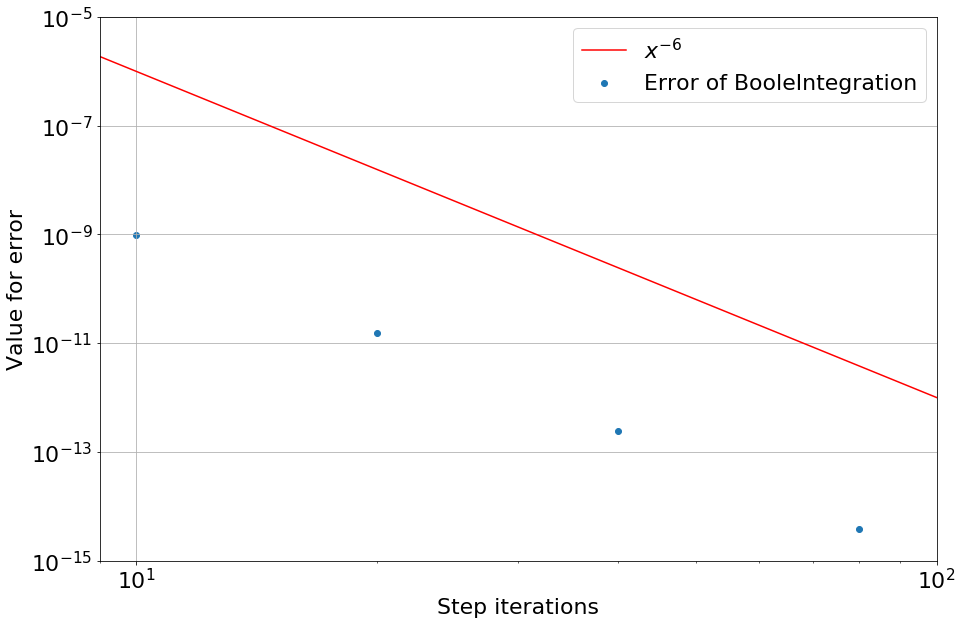

In [54]:


#--- Scales --- 

plt.yscale('log')
plt.xscale('log')


#--- Plot --- 
plt.scatter(error[:,0],error[:,1],label = "Error of BooleIntegration")
plt.plot(x,y,'r-',label = "$x^{-6}$");

#--- Limits --- 

plt.xlim(9, 100);
plt.ylim(10**-15, 10**-5)

#--- Labels ---

plt.ylabel("Value for error")
plt.xlabel("Step iterations")
plt.grid()
plt.legend();

# Question 4 - integrand with a singularity

The techniques developed in the lecture require the integrand to be continuous and bounded. What happens if there is a singularity in the integrand? In general these can be difficult to deal with (though some more generic methods exist - see, e.g., [Tanh-sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature)).

In this example we will look at an explicit example that can be dealt with by a change of variables. Consider the identity:

$$ \int_0^1 \frac{f(x)}{x^\alpha}\, dx = \frac{1}{\alpha} \int_0^1 f(t^{1/\alpha}) t^{(1-2\alpha)/\alpha}\,dt$$

which is achived by changing variables using $t = x^\alpha$. This identity holds when $0 < \alpha < 1$ and $f(x)$ is continous on $[0,1]$.

Let
$$I = \int^1_0 \frac{\cos(10x)}{x^{1/2}}\,dx $$

Plot the integrand in the range $[0,1]$, use a grid and label your axes.

In [49]:
def I(x):
    return np.cos(10*x)/np.sqrt(x)

/home/owen/Downloads/home/owen/yeet/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


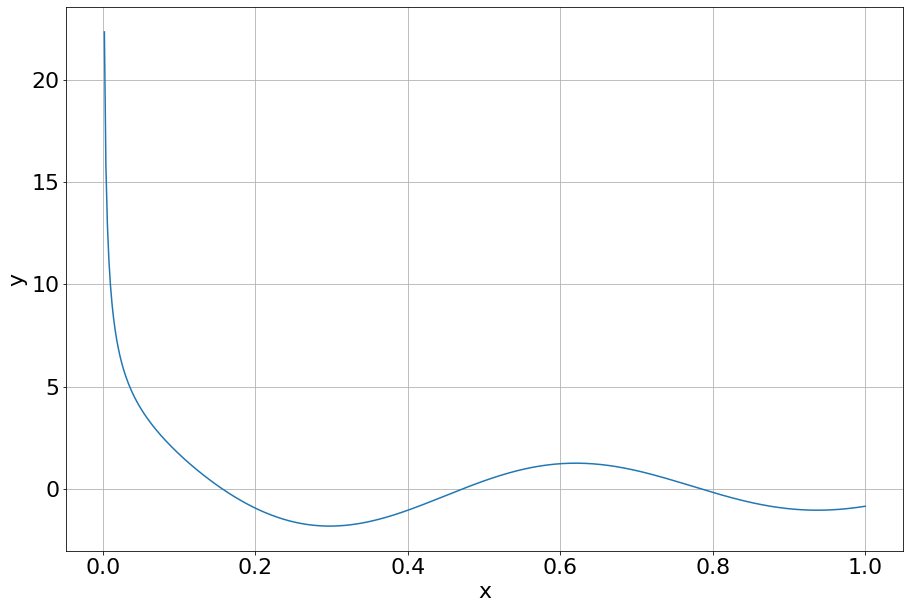

In [58]:
x = np.linspace(0,1,500)

#--- Plot --- 
plt.plot(x,I(x));

#--- Labels --- 

plt.xlabel("x")
plt.ylabel("y")
plt.grid()

Define and plot the transformed integrand. For the plot use a grid and label your axes.

In [61]:
def transformed(t):
    return 2*np.cos(10*t**2)

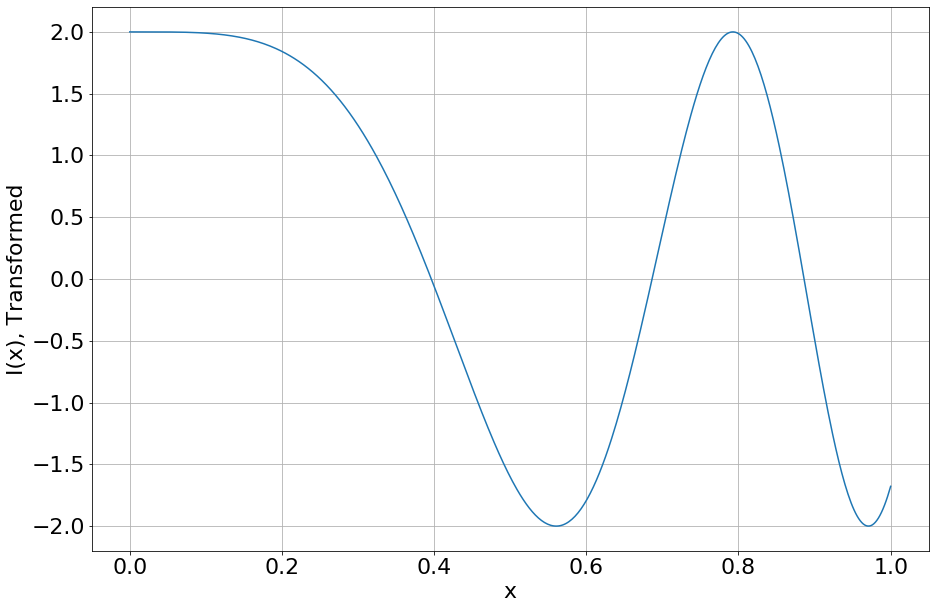

In [62]:
# --- Plot --- 

plt.plot(x, transformed(x))

# --- Labels --- 

plt.xlabel("x")
plt.ylabel("I(x), Transformed")
plt.grid()

Numerically evaluate $I$ using Simpson's rule. Use 100 strips to do this.

In [68]:
print("Integral of I(x) using 100 strips is equal to", SimpsonsIntegrate(transformed, 0, 1, 100))

Integral of I(x) using 100 strips is equal to 0.34636620914645183


# Question 5

Write your own function to integrate the following data using Simpson's rule.

In [75]:
x = np.linspace(0, np.pi, 101)
dx = x[1]-x[0]
y = np.sin(x)

In [78]:
def SimpsonsIntegrateData(x, y, dx):
    area = 0
    
    for i in range(0, int((len(x) - 1)/2)):
        area += (dx/3)*(y[2*i] + 4*y[2*i + 1]+ y[2*i + 2]) 
        #3 is used instead of 6, because there are two iterations ran thus 6 in total is covered. 
    return area

Integrate the data using your function

In [79]:
print("Integral of asked function is equal to", SimpsonsIntegrateData(x, y, dx))

Integral of asked function is equal to 2.000000010824504


Recall that Simpson's method needs an odd number of data points to work. If you use an even number you will get a bad result. If you check the convergence rate in this case you will see it is not what is expected. Checking the convergence rate is an important test of an integration code.

# Question 6

Evaluate the following integral using both Simpsons rule and an RK4 ODE method

$$ \int_0^5 \sinh(x) (x-5)\, dx $$

Compare the results of the two methods and take sufficient strips/small enough step sizes to ensure the results agree to a relative accuracy of 1e-6.

In [85]:
def arraysolver(f, dx, x0, y0, imax):
    xi = x0
    yi = y0
    steps = np.zeros((imax+1,2))
    steps[0,0] = x0
    steps[0,1] = y0
    i = 0
    while i < imax:
        k1 = dx*f(xi,yi)
        k2 = dx*f(xi + 0.5*dx, yi + 0.5*k1)
        k3 = dx*f(xi + 0.5*dx, yi + 0.5*k2)
        k4 = dx*f(xi + dx, yi + k3)
        yi += 1/6*(k1 + 2*k2 + 2*k3 + k4)    
        xi += dx
        i  += 1
        steps[i, 0] = xi
        steps[i, 1] = yi          
    return [xi, yi]

In [83]:
def e(x, y = 0): #Function dependant on two parameters, x and y 
    return np.sinh(x)*(x - 5)

In [89]:
print("Simpson's Method outputs the following",SimpsonsIntegrate(e, 0, 5, 5)) #5 Steps used from 0 to 5 
print("and the RK4 method gives", arraysolver(e, 1, 0, 0, 5)[1])   #5 Steps used from 0 to 5 


Simpson's Method outputs the following -69.12792746842231
and the RK4 method gives -69.12792746842231
